# Step-1: Business problem Understanding.

Create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help reaserchers classify penguins in the field, insted of needing an experienced blogist.

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as  plt
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("penguins_size.csv")

In [3]:
df.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# Step-2: Data Understanding
    

penguins_size.csv: Simplified data from original penguin data sets.

* species: penguin species (Adelie, chinstrap or Gentoo)
* culmen_lenth_mm:culmen lenth(mm)
* culmen_depth_mm: culmen depth(mm)
* Flipper_lenth_mm:flipper lenth in mm
* body_mass_g:body mass(g)
* island : island name(Dream,Trgersen, or Biscoe)
* Sex: Penguin sex
    

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# Step-3: Data Processing

# EDA

In [5]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [6]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [7]:
df['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [8]:
df=df[df['sex']!='.']
df.shape

(343, 7)

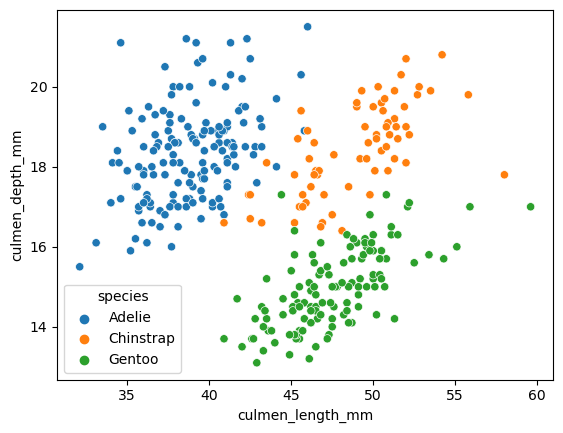

In [9]:
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=df,hue='species')

plt.show()

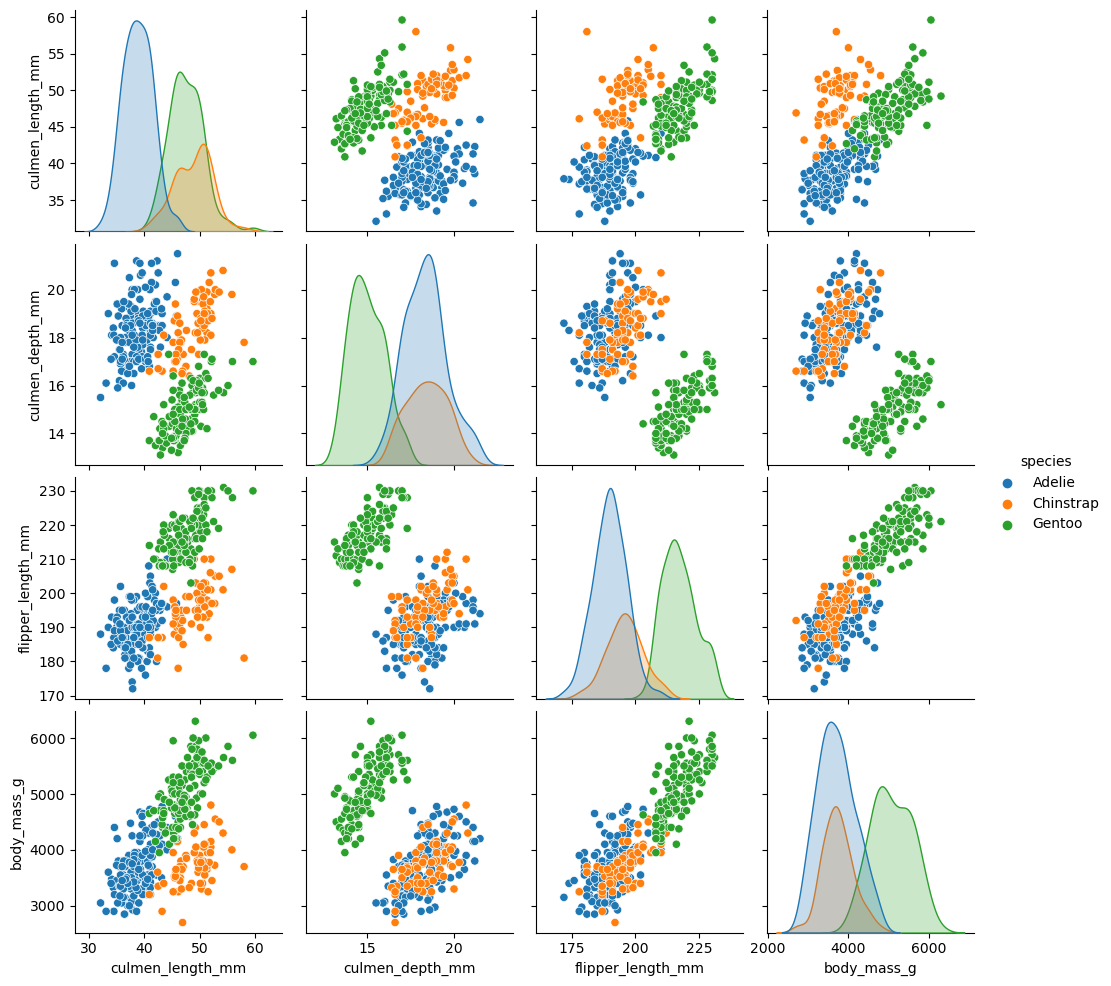

In [10]:
sns.pairplot(df,hue='species')
plt.show()

# Data Cleaning

In [11]:
df.isna().sum()


species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [12]:
df=df.dropna()

In [13]:
df.shape

(333, 7)

# Encoding


In [14]:
df1=df.drop('species',axis=1)
x=pd.get_dummies(df1,drop_first=True)

In [15]:
y=df['species']

# Train/Test Split

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=0)


# step-4,5: Modelling and Evaluation

In [17]:
#Decision tree classifier -WWITH DEFAULT Hyperparameters

from sklearn.tree import DecisionTreeClassifier
df_default = DecisionTreeClassifier(random_state=0)
df_default.fit(x_train,y_train)

#prediction
pred_train= df_default.predict(x_train)
base_pred= df_default.predict(x_test)

#Evaluation 

# 1.train & Test Accuracy

from  sklearn.metrics import accuracy_score
print("Train_accuracy:",accuracy_score(pred_train,y_train))
print("Test_accuracy:",accuracy_score(base_pred,y_test))

#2. Cross validation score

from sklearn.model_selection import cross_val_score
scores = cross_val_score(df_default,x,y,cv=5)
print("Cross Validation Score:",scores.mean())


Train_accuracy: 1.0
Test_accuracy: 0.98
Cross Validation Score: 0.9698778833107191


In [18]:
df_default.predict([[30,20,150,4000,1,0,1]])

array(['Adelie'], dtype=object)

# Visualize the tree

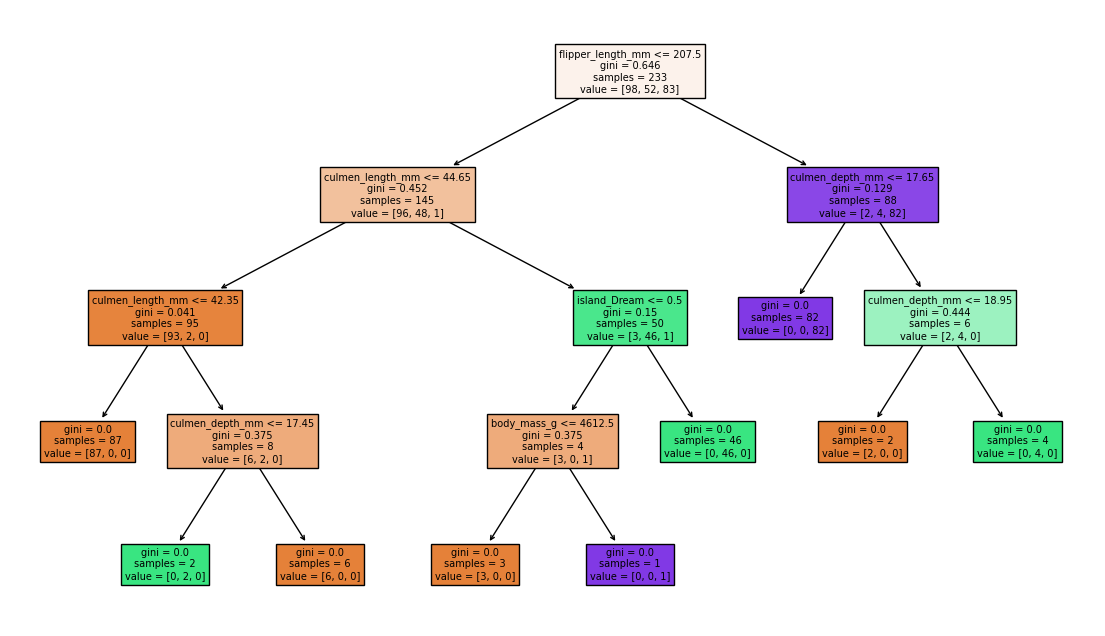

In [19]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,8),dpi=100)
plot_tree(df_default,filled=True,feature_names=x.columns)
plt.show()

# IMportance of each features given by  this model

In [20]:
df_default.feature_importances_


array([0.36561338, 0.09537009, 0.48935164, 0.00995953, 0.03970535,
       0.        , 0.        ])

In [21]:
pd.DataFrame(index=x.columns,data=df_default.feature_importances_,columns=["Feature Importance"])

,Feature Importance
culmen_length_mm,0.365613
culmen_depth_mm,0.095370
flipper_length_mm,0.489352
body_mass_g,0.009960
island_Dream,0.039705
island_Torgersen,0.000000
sex_MALE,0.000000


# HyperParmeter Tunning

In [22]:
from sklearn.model_selection import GridSearchCV

#model
estimator=DecisionTreeClassifier(random_state=0)

#parameters (which you want to tune and identify the best)

param_grid = {"criterion":["gini","entropy"],'max_depth':[1,2,3,4]}

grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)

grid.fit(x_train,y_train)

grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

# FInal Decision Tree

with best hyper parameters & with important features

In [23]:
x=x.drop(["island_Torgersen","sex_MALE"],axis=1)

x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=0)

dt_bhp = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
dt_bhp.fit(x_train,y_train)
ypred_train=dt_bhp.predict(x_train)
ypred_test=dt_bhp.predict(x_test)

print("Train Accuracy",accuracy_score(ypred_train,y_train))
print("Test Accuracy",accuracy_score(ypred_test,y_test))

scores=cross_val_score(dt_bhp,x,y,cv=5)
print("Cross validation Score",scores.mean())

Train Accuracy 0.9871244635193133
Test Accuracy 0.95
Cross validation Score 0.9608774310266849


# Prediction on single value

In [25]:
dt_bhp.predict([[30,20,150,4000,1]])

array(['Adelie'], dtype=object)

# Optimization-- Pruning of decision Tree

In [29]:
def report_model(model):
    model.fit(x_train,y_train)
    model_preds=model.predict(x_test)
    pred_train=model.predict(x_train)
    print("Train_Accuracy:",accuracy_score(y_train,pred_train))
    print("Test Acuracy:",accuracy_score(y_test,model_preds))
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=x.columns)

# Max Depth

Train_Accuracy: 0.9871244635193133
Test Acuracy: 0.95


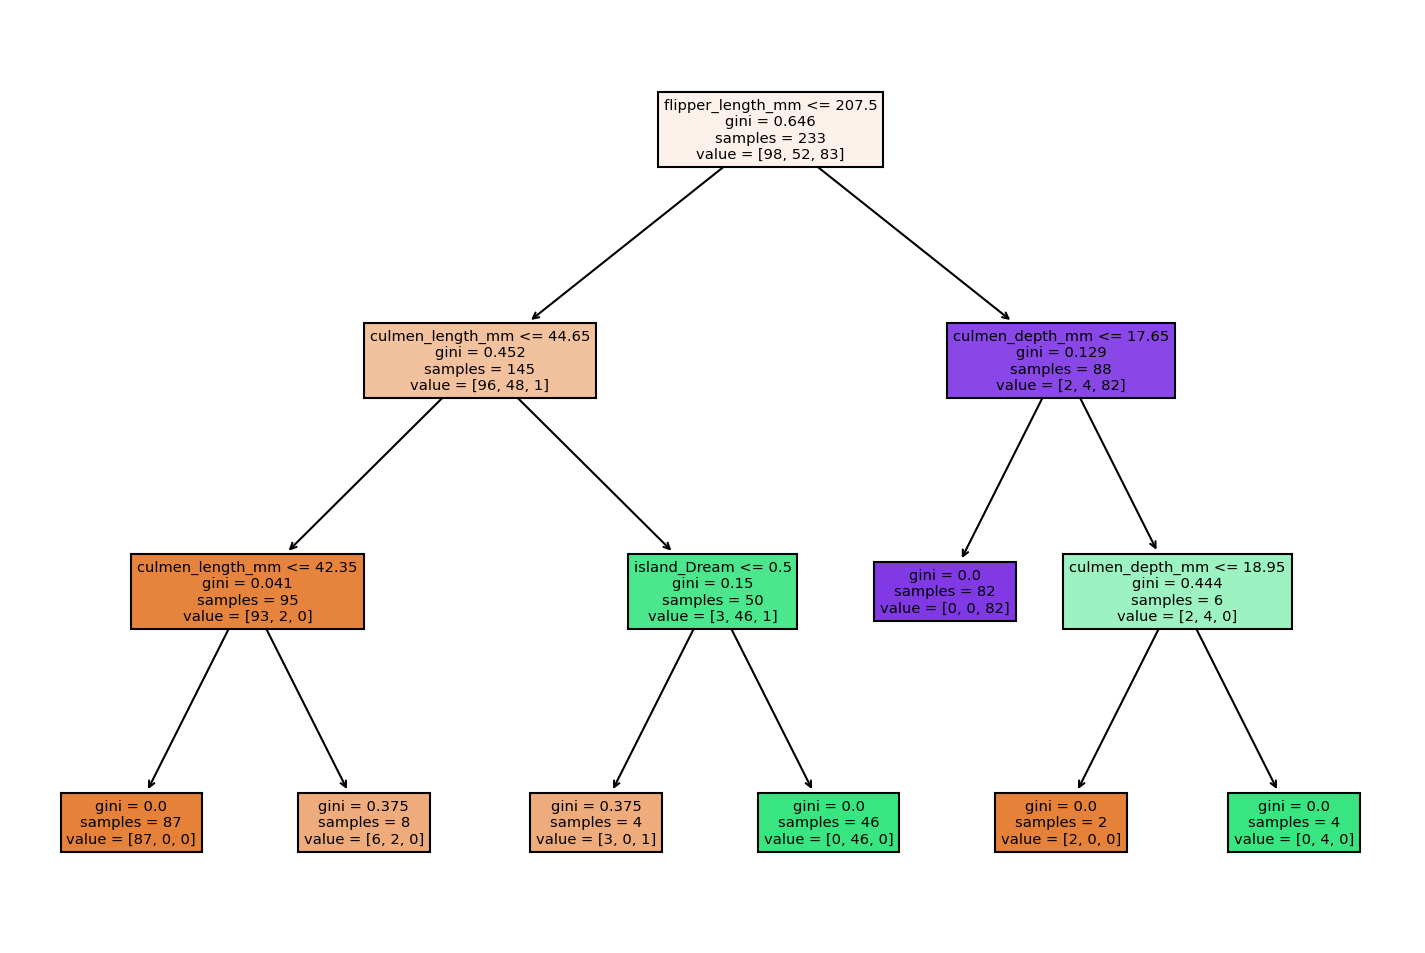

In [30]:
pruned_tree=DecisionTreeClassifier(max_depth=3)
report_model(pruned_tree)


# Max Leaf Nodes

Train_Accuracy: 0.9871244635193133
Test Acuracy: 0.95


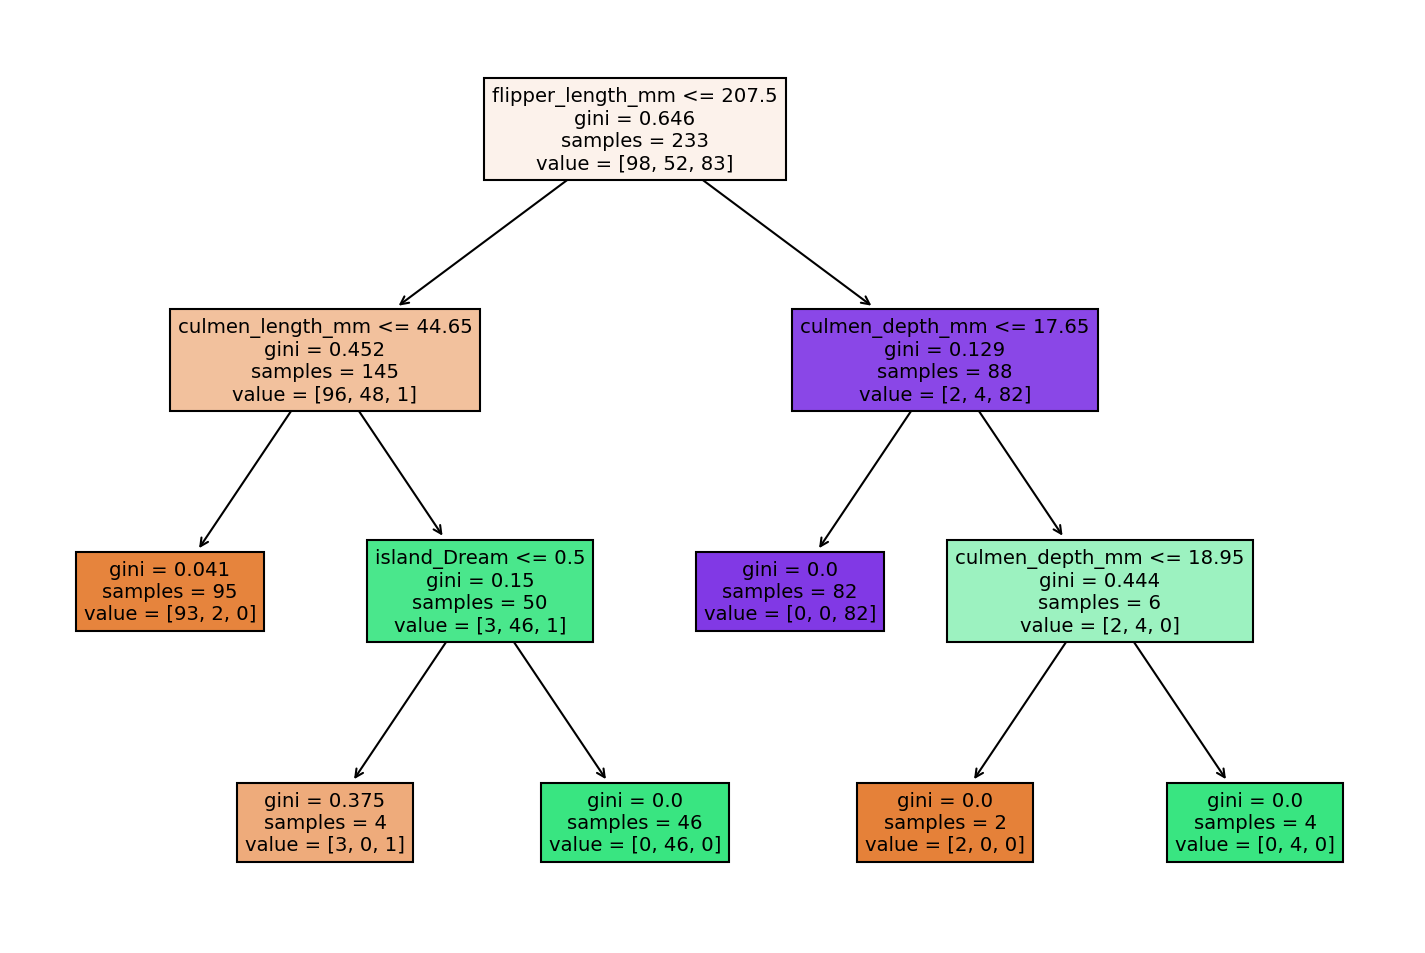

In [31]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=6)
report_model(pruned_tree)